# Sample Project using TensorFlow

# Image Classification of Fashion MNIST dataset

## Installing TensorFLow

In [2]:
!pip install tensorflow==2.0.0-beta1

     |████████████████████████████████| 87.9MB 65kB/s 
     |████████████████████████████████| 501kB 44.9MB/s 
     |████████████████████████████████| 3.1MB 37.0MB/s 
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow~=2.1.0, but you'll have tensorflow 2.0.0b1 which is incompatible.
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow-addons~=0.7.0, but you'll have tensorflow-addons 0.8.3 which is incompatible.
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


## Importing Necessary Libraries

In [3]:
from __future__ import absolute_import,division,print_function,unicode_literals

#Tensor Flow and keras library
import tensorflow as tf
from tensorflow import keras

#Helping libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__) 

2.0.0-beta1


## Importing Fashion MNIST dataset

In [5]:
fashion_dataset = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_dataset.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## Explore the data

In [7]:
print(test_images)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [14]:
print(train_images.shape)
len(train_labels)

(60000, 28, 28)


60000

In [15]:
print(test_images.shape)
len(test_labels)

(10000, 28, 28)


10000

## Preprocess the data

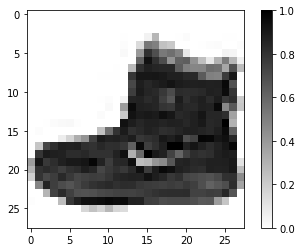

In [23]:
plt.imshow(train_images[0],cmap=plt.cm.binary)
plt.colorbar()
plt.show()

In [0]:
#Data normalization
train_images = train_images / 255.0
test_images = test_images / 255.0

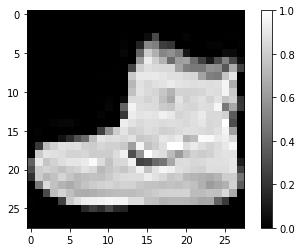

In [25]:
# After data normalization 
plt.imshow(train_images[0],cmap='gray')
plt.colorbar()
plt.show()

## Build the Model

In [0]:
model = keras.Sequential([
              keras.layers.Flatten(input_shape=(28,28)),
              keras.layers.Dense(128,activation='relu'),
              keras.layers.Dense(10,activation='softmax')
])

## Compile the Model

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Training
### Feed the Model

In [31]:
model.fit(train_images,train_labels,epochs=10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.4908 - accuracy: 0.8280
Epoch 2/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3727 - accuracy: 0.8662
Epoch 3/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.3352 - accuracy: 0.8778
Epoch 4/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3106 - accuracy: 0.8864
Epoch 5/10
60000/60000 [==============================] - 5s 75us/sample - loss: 0.2929 - accuracy: 0.8922
Epoch 6/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.2792 - accuracy: 0.8963
Epoch 7/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2672 - accuracy: 0.9006
Epoch 8/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2557 - accuracy: 0.9045
Epoch 9/10
60000/60000 [===

## Testing
### Evaluate accuracy

In [32]:
test_loss, test_accuracy = model.evaluate(test_images,test_labels)
print(test_accuracy)

10000/10000 [==============================] - 0s 38us/sample - loss: 0.3293 - accuracy: 0.8858
0.8858


### Prediction

In [34]:
prediction = model.predict(test_images)
prediction[0]

array([3.5556384e-06, 5.8590036e-08, 1.2506009e-08, 3.4755730e-11,
       6.0972468e-08, 5.3467706e-04, 8.3033896e-08, 8.1108147e-03,
       1.8743259e-08, 9.9135077e-01], dtype=float32)

In [36]:
np.argmax(prediction[0])

9

In [38]:
test_labels[0]

9

### Plot of prediction

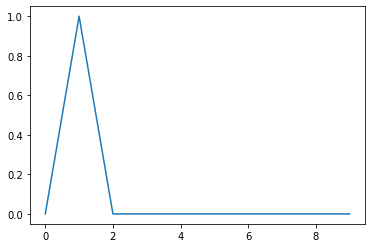

In [41]:
plt.plot(prediction[3])
plt.show()